# MOwNiT
## Laboratorium
### Całkowanie

In [2]:
using Pkg
# Pkg.add("QuadGK")
using QuadGK
using Polynomials

   Updating registry at `~/.julia/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


Fetching: [========================================>]  99.9 %Fetching: [=====>                                   ]  11.7 %Fetching: [=======>                                 ]  16.6 %Fetching: [================>                        ]  38.0 %                   ]  51.1 %Fetching: [========================>                ]  59.4 %Fetching: [===========================>             ]  66.4 %Fetching: [============================>            ]  68.6 %Fetching: [=================================>       ]  80.8 %Fetching: [=================================>       ]  81.6 %Fetching: [==================================>      ]  82.9 %Fetching: [===================================>     ]  85.7 %

  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
  [1fd47b50] + QuadGK v2.4.2
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]


Kwadratury Gaussa bazują na tzw. odciętych punktów Gaussa $x_{i}$ oraz współczynnikach $a_{i}$


In [3]:
# funkcja obliczająca odcięte punktów Gaussa oraz ich współczynniki
(xp, a) = gauss(Float64,7);

In [4]:
xp

7-element Array{Float64,1}:
 -0.9491079123427585
 -0.7415311855993945
 -0.4058451513773972
  0.0
  0.4058451513773972
  0.7415311855993945
  0.9491079123427585

In [4]:
a

7-element Vector{Float64}:
 0.12948496616886981
 0.2797053914892767
 0.38183005050511887
 0.41795918367346907
 0.38183005050511887
 0.2797053914892767
 0.12948496616886981

Podstawowe użycie w/w danych: 
aby policzyć $\int_{-1}^{1} f dx$  używamy odciętych punktów wraz z wagami wg wzoru 
$\sum_{i=1}^{n}{a_{i}f(x_{i})}$


In [5]:
f(x)=x^2
sum(a .* f.(xp)) 

0.6666666666666669

### Zadanie 1 (1p)
- Korzytając z pakietu <a href="https://github.com/JuliaMath/Polynomials.jl">Polynomials</a> zaimplementuj wielomiany Legendre'a zdefiniowane w taki sposób:

$P_{0}(x)=1$

$P_{1}(x)=x$

$P_{k+1}(x)=\frac{2k+1}{k+1} x P_{k}(x)-\frac{k}{k+1}P_{k-1}(x)$

- narysuj ich wykresy w przedziale (-1,1). 
- sprawdź(np. za pomocą fukcji <i>roots</i> z pakietu Polynomials), że ich zera  sa odciętymi punktów Gaussa. Test wykonaj dla wielomianow od 2 do 4 stopnia
- podaj związek tego faktu z podstawowym twierdzeniem kwadratur Gaussa (z wykładu)

In [13]:
function legendre_polynomial(n)
    if n==0
        return Polynomial([1])
    end
    if n==1
        return Polynomial([0,1])
    end
    m = zeros(Float64,n+1,n+1)
    m[1, 1] = 1
    m[2, 2] = 1
    
    for i in 3:n+1
        for j in 1:n
            m[i, j+1] += (2*i-3) / (i-1) * m[i-1,j]
            m[i,j] -= (i-2)/(i-1) * m[i-2,j]
        end
    end    
    coefs = [m[n+1,j] for j in 1:n+1]
    result = Polynomial(coefs)
    result
end



legendre_polynomial (generic function with 1 method)

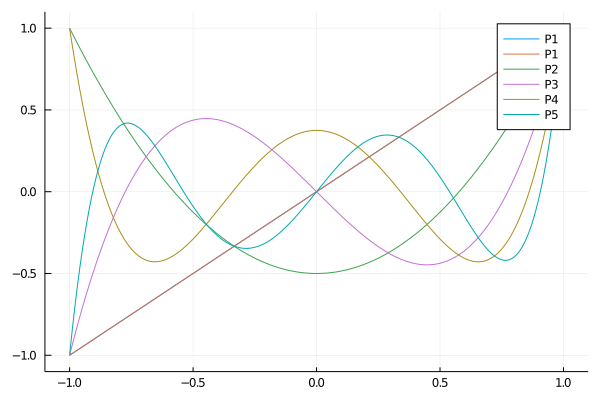

In [15]:
using Plots

range = -1:0.01:1

# 0
leg_poly0 =  legendre_polynomial(1)
values = [leg_poly0(x) for x in  range]
plot!(range, values, label="P1",xlims=(-1.1, 1.1), ylims=(-1.1,1.1))
# 1
leg_poly1 =  legendre_polynomial(1)
values = [leg_poly1(x) for x in  range]
plot!(range, values, label="P1",xlims=(-1.1, 1.1), ylims=(-1.1,1.1))
# 2
leg_poly2 =  legendre_polynomial(2)
values = [leg_poly2(x) for x in  range]
plot!(range, values, label="P2",xlims=(-1.1, 1.1), ylims=(-1.1,1.1))
# 3
leg_poly3 =  legendre_polynomial(3)
values = [leg_poly3(x) for x in  range]
plot!(range, values, label="P3",xlims=(-1.1, 1.1), ylims=(-1.1,1.1))
# 4
leg_poly4 =  legendre_polynomial(4)
values = [leg_poly4(x) for x in  range]
plot!(range, values, label="P4",xlims=(-1.1, 1.1), ylims=(-1.1,1.1))
# 5
leg_poly5 =  legendre_polynomial(5)
values = [leg_poly5(x) for x in  range]
plot!(range, values, label="P5",xlims=(-1.1, 1.1), ylims=(-1.1,1.1))


In [17]:
for i in 2:4
    println()
    println(i, "degree polynomial")
    println("   gauss: ",gauss(Float64,i)[1])
    println("legendre: ",sort(roots(legendre_polynomial(i))))
end


2degree polynomial
   gauss: [-0.5773502691896258, 0.5773502691896258]
legendre: [-0.5773502691896258, 0.5773502691896256]

3degree polynomial
   gauss: [-0.7745966692414834, 0.0, 0.7745966692414834]
legendre: [-0.7745966692414834, 0.0, 0.7745966692414835]

4degree polynomial
   gauss: [-0.8611363115940526, -0.3399810435848563, 0.3399810435848563, 0.8611363115940526]
legendre: [-0.8611363115940536, -0.33998104358485653, 0.3399810435848563, 0.8611363115940531]


Odcięte xi n-punktowej kwadratury Gaussa z funkcją ważącą w(x) w [a,b] są zerami wielomianu ortogonalnego φn(x) dla tego samego przedziału i tej samej funkcji ważącej.

### Zadanie 2 (1p)
- Napisz funkcję, która dla podanej liczby punktów Gaussa $k$ oraz funkcji $f$  policzy $\int_{-1}^{1} f dx$
metodą używającą funkcji:
```julia
gauss(k)
```
oraz sumy 
```julia
sum(a .* f.(xp)) 
```
- przetestuj dla wielomianów coraz większych stopni
- sprawdz kiedy przestaje być dokładna, 
- podaj związek z twierdzeniem o  stopniu dokładności kwadratury Gaussa 

In [24]:
function integral_gauss(fun, k)
    x, a = gauss(k)
    val = sum(a .* fun.(x))
    return val
end

integral_gauss (generic function with 1 method)

In [21]:
polynomials_coeffs = [[1 for i in 1:j] for j in 1:8]
quad_degree = 3
polynomials = [Polynomial(coeffs) for coeffs in polynomials_coeffs]

8-element Array{Polynomial{Int64,:x},1}:
 Polynomial(1)
 Polynomial(1 + x)
 Polynomial(1 + x + x^2)
 Polynomial(1 + x + x^2 + x^3)
 Polynomial(1 + x + x^2 + x^3 + x^4)
 Polynomial(1 + x + x^2 + x^3 + x^4 + x^5)
 Polynomial(1 + x + x^2 + x^3 + x^4 + x^5 + x^6)
 Polynomial(1 + x + x^2 + x^3 + x^4 + x^5 + x^6 + x^7)

In [28]:
for polynomial in polynomials
    println("Polynomial: ", polynomial)
    println("My function result: ", integral_gauss(polynomial, quad_degree),
        ", Expected result: ", quadgk(polynomial, -1, 1)[1])
    println()
end

Polynomial: 1
My function result: 1.9999999999999998, Expected result: 2.0

Polynomial: 1 + x
My function result: 1.9999999999999996, Expected result: 2.0

Polynomial: 1 + x + x^2
My function result: 2.666666666666666, Expected result: 2.6666666666666665

Polynomial: 1 + x + x^2 + x^3
My function result: 2.6666666666666665, Expected result: 2.6666666666666665

Polynomial: 1 + x + x^2 + x^3 + x^4
My function result: 3.0666666666666664, Expected result: 3.0666666666666664

Polynomial: 1 + x + x^2 + x^3 + x^4 + x^5
My function result: 3.0666666666666664, Expected result: 3.0666666666666664

Polynomial: 1 + x + x^2 + x^3 + x^4 + x^5 + x^6
My function result: 3.3066666666666666, Expected result: 3.352380952380952

Polynomial: 1 + x + x^2 + x^3 + x^4 + x^5 + x^6 + x^7
My function result: 3.3066666666666666, Expected result: 3.352380952380952



Funkcja przestaje być dokładna przy wielomianie 6 stopnia. Jest to zgodne z Twierdzeniem o stopniu dokładności kwadratury Gaussa:

Kwadratura ma stopien dokladnosci 2n - 1 dla n punktowej kwadratury

W moim przypadku stopień kwadratury to 3, zatem mogę się spodziewać dokładnego wyniku dla wielomianu co najwyżej 5 stopnia.

### Zadanie 3 (1p)
  
Skorzystaj z rozwiązania zadania 2 do napisania funkcji 
liczącej  całki w dowolnym przedziale $\int_{a}^{b} f(x) dx$ 

dokonując normalizacji  do $\int_{-1}^{1} F(z) dz$ 

podstawiając:

$x=\frac{b+a}{2}+ \frac{b-a}{2} z $ oraz 

$dx =\frac{b-a}{2} dz $

Przetestuj działanie na kilku przykładach i sprawdź z wynikami otrzymanymi analitycznie.


In [30]:
function integral_gauss_interval(fun, a, b, n)
    x, w = gauss(n)
    x = (b+a)/2 .+ (b-a)/2 *x
    value = (b-a)/2 * sum(fun.(x) .* w)
    return value
end

integral_gauss_interval (generic function with 1 method)

In [31]:
println("Function: 2 + x + x^2 + 5x^3, Interval: [5,10]")


println("expected value: ", 12058)
for i in 1:5
    println("for ",i," quadrature points: ", 
        integral_gauss_interval(x -> 2 + x + x^2 + 5x^3, 5, 10, i))
end


Function: 2 + x + x^2 + 5x^3, Interval: [5,10]
expected value: 12058
for 1 quadrature points: 10875.625
for 2 quadrature points: 12057.91666666666
for 3 quadrature points: 12057.916666666664
for 4 quadrature points: 12057.916666666668
for 5 quadrature points: 12057.916666666664


In [32]:
println("Function: 2cos(x/2), Interval: [2,10]")


println("expected value: ", -7.2016)
for i in 1:5
    println("for ",i," quadrature points: ", 
        integral_gauss_interval(x -> 2cos(x/2), 2, 10, i))
end


Function: 2cos(x/2), Interval: [2,10]
expected value: -7.2016
for 1 quadrature points: -15.839879945607127
for 2 quadrature points: -6.402360072719443
for 3 quadrature points: -7.2300367124858695
for 4 quadrature points: -7.201052334732104
for 5 quadrature points: -7.20158706900403


In [34]:
println("Function: 5e^x + 7, Interval: [2,4]")


println("expected value: ", 250.05)
for i in 1:5
    println("for ",i," quadrature points: ", 
        integral_gauss_interval(x -> 5exp(x) + 7, 2, 4, i))
end

Function: 5e^x + 7, Interval: [2,4]
expected value: 250.05
for 1 quadrature points: 214.8553692318767
for 2 quadrature points: 249.27154386759094
for 3 quadrature points: 250.0388958146693
for 4 quadrature points: 250.0454400317223
for 5 quadrature points: 250.04546958823747


### Zadanie 4 (1p)
Głowną funkcją pakietu QuadGK jest adaptacyjna funkcja <a href="https://juliamath.github.io/QuadGK.jl/stable/#QuadGK.quadgk"> guadgk</a> używająca całkowania  Gauss-Kronroda

- użyj tej funkcji do policzenia  całki dla przykładowego wielomianu.
- funkcja ta ma możliwość liczenia również całek do nieskończoności.


 Policz całkę od minus do plus nieskonczonosci 
 standardowego rozkładu normalnego Gaussa
$ \frac{1}{\sqrt{2\pi}}exp(\frac{-x^2}{2})$

In [35]:
test_poly = Polynomial([1,2,3,4,5,6,7])
value, error = quadgk(test_poly, 0, 2)

(253.99999999999994, 0.0)

In [36]:
normal_distribution_fun = x -> 1/sqrt(2*pi) * exp(-x^2 / 2)
value, error = quadgk(normal_distribution_fun, -Inf,Inf)

(1.0000000000032583, 1.4395584941504537e-8)

### Zadanie 5 (3p)
Napisz własne funkcje całkujące -  w wybranym przedziale (a,b) - złożonymi metodami prostokątów, trapezów oraz Simpsona. Dla stałego przedziału zwiększaj liczbę użytych punktów (n). Narysuj wykresy funkcji błędu  w stosunku do wyniku otrzymanego analitycznie, 
w zależnosci od $h=\frac{b-a}{n}$:
1. wykładniczej
2. trygonometrycznej (np. sin (x) w przedziale $[0,2\pi]$)


In [40]:
function rectangle_integration(fun, a, b, n)
    value = 0
    h = (b-a)/n
    for i in 1:n
       value += fun(a + (i-1)*h + h/2) * h
    end
    value
end

function trapezoidal_integration(fun, a, b, n)
    value = 0
    h = (b-a)/n
    for i in 0:n
        fa = a + h * i
        fb = a + h * (i+1)
        value += (fun(fa) + fun(fb)) * h / 2
    end
    value
end

function Simpson_integration(fun, a, b, n)
    value = 0
    h = (b-a)/n
    for i in 0:2:n
        x = a + h * 2 * i
        value += h * (fun(x) + 4 * fun(x + h) + fun(x + 2 * h)) / 3
    end
    value
end

Simpson_integration (generic function with 1 method)

In [41]:
using DataFrames

In [ ]:
df1 = DataFrame(count = Int64[], 
    t = String[],
    error = Float64[])

for i=1:1:100
    push!(df1, [i "exp" abs( rectangle_integration(exp, -10, 0, i)  -(exp(0)-exp(-10)) ) ])
    push!(df1, [i "sin" abs( rectangle_integration(sin, 0, 2*pi, i) -(-cos(2*pi)+cos(0)) ) ])
    push!(df1, [i "ln" abs( rectangle_integration(x -> 1/x, 1/2, 10, i) -(log(10) - log(1/2)) ) ])
end
